# **Machine Learning** _Day 79_
##### Name: Muhammad Hassaan
##### Date: July 26, 2024
##### Email: muhammadhassaan7896@gmail.com

# **Decision Tree**

In [207]:
import math 

In [208]:
# example dataset
# let's say we have a dataset with two classes A and b 
# suppose in a dataset of 10 elements, 4 are of class A and 6 are of class B

# number of elements in each class
n_A = 4
n_B = 6

# total number of elements
total = n_A + n_B

In [209]:
# lets calculate the proportions 

p_A = n_A / total
p_B = n_B / total

# print the proportions 
print("proportion of class A: ", p_A)
print("proportion of class B: ", p_B)

proportion of class A:  0.4
proportion of class B:  0.6


In [210]:
# calculate entropy 

entropy = - p_A * math.log2(p_A) - p_B * math.log2(p_B)
print("Entropy: ", entropy)

Entropy:  0.9709505944546686


In [211]:
# gini impurity 

gini = 1 - p_A**2 - p_B**2
print("Gini Impurity: ", gini)

Gini Impurity:  0.48


In [212]:
# Information Gain
# Assuming a split on some feature divides the dataset into two subsets
# Subset 1: 2 elements of A, 3 of B
# Subset 2: 2 elements of A, 3 of B
# Entropy and size for each subset
n_1_A, n_1_B = 2, 3
n_2_A, n_2_B = 2, 3

p_1_A = n_1_A / (n_1_A + n_1_B)
p_1_B = n_1_B / (n_1_A + n_1_B)
entropy_1 = -p_1_A * math.log2(p_1_A) - p_1_B * math.log2(p_1_B) if p_1_A and p_1_B else 0

p_2_A = n_2_A / (n_2_A + n_2_B)
p_2_B = n_2_B / (n_2_A + n_2_B)
entropy_2 = -p_2_A * math.log2(p_2_A) - p_2_B * math.log2(p_2_B) if p_2_A and p_2_B else 0

# Calculating information gain
info_gain = entropy - ((n_1_A + n_1_B) / total * entropy_1 + (n_2_A + n_2_B) / total * entropy_2)
print("Information Gain: ", info_gain)

Information Gain:  0.0


# **Decision Tree Example in Python**

In [213]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [214]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [215]:
# check null values 
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [216]:
# drop deck column 
df.drop('deck', axis=1, inplace=True)

# impute missing values of age and fare using median 
imputer = SimpleImputer(strategy='median')
df[['age', 'fare']] = imputer.fit_transform(df[['age', 'fare']])

# impute missing values of embarked and embark_town using mode
imputer = SimpleImputer(strategy='most_frequent')
df[['embarked', 'embark_town']] = imputer.fit_transform(df[['embarked', 'embark_town']])

In [217]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [219]:
# encode the categorical and object variables using for loop and label encoder
le = LabelEncoder()
for col in df.columns:
    for col in df.select_dtypes(include=['category', 'object']):
        df[col] = le.fit_transform(df[col])

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int64  
 8   class        891 non-null    int64  
 9   who          891 non-null    int64  
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    int64  
 12  alive        891 non-null    int64  
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(10)
memory usage: 85.4 KB


In [221]:
# split the data into X and y 
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [222]:
# create and train the model with pred 
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [223]:
# predict the test set results
pred = model.predict(X_test)

# evaluate the model 
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[92 13]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Text(95.72222222222221, 0.5, 'Actual')

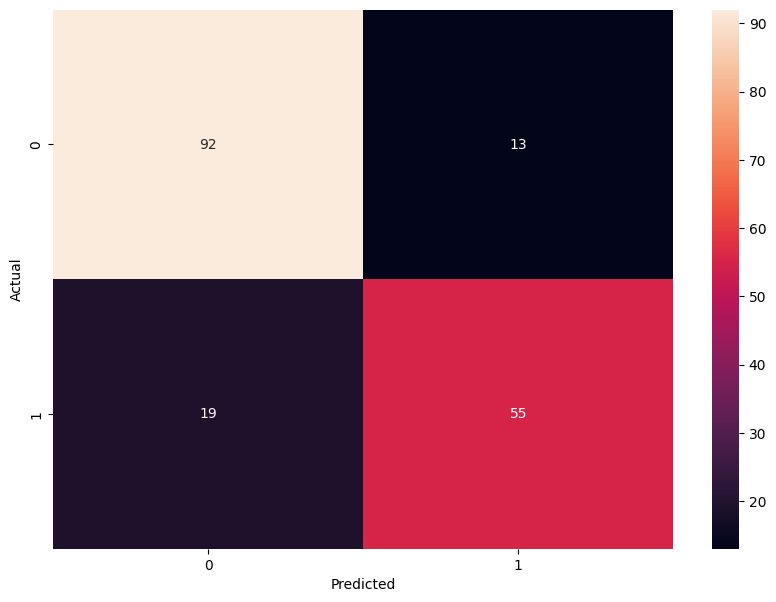

In [224]:
# plot the confusion matrix 
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [225]:
# save the decison tree classifier 
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./saved_models/Decision_tree_titanic_03.dot', feature_names=X.columns, filled = True, rounded = True)